In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, SimpleRNN
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from tensorflow import keras
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Pave_\AppData\Local\Temp\ipykernel_7064\1872801710.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization


In [2]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина экшена
max_action_len = 50
#Число классов
num_classes = 15

# Загрузка тренировочных данных

In [3]:
train = pd.read_csv('actionsNPCDataSet/trainActions.csv',header=None,
names=['class', 'text'])

In [4]:
#Получение экшенов
actions = train['text']

In [5]:
y_train = utils.to_categorical(train['class'] - 1, num_classes)

# Токенизация

In [6]:
tokenizer = Tokenizer(num_words=num_words)

In [7]:
#Обучение токенайзера
tokenizer.fit_on_texts(actions)

In [8]:
train_sequences = tokenizer.texts_to_sequences(actions)

In [9]:
x_train = pad_sequences(train_sequences, maxlen=max_action_len)

# Загрузка тестовых данных

In [10]:
test = pd.read_csv('actionsNPCDataSet/actionsTest.csv', header=None,
                   names=['class', 'text'])

In [11]:
#Получение экшенов
test_actions = test['text']

In [12]:
y_test = utils.to_categorical(test['class'] - 1, num_classes)

# Токенизация

In [13]:
test_sequences = tokenizer.texts_to_sequences(test_actions)

In [14]:
x_test = pad_sequences(test_sequences, maxlen=max_action_len)

# Модель

In [15]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=116, input_length=max_action_len,
                    embeddings_regularizer=keras.regularizers.l2(0.001)))
model.add(GRU(units=28, activation='selu', kernel_regularizer=keras.regularizers.l2(0.0001), return_sequences=True))
model.add(GRU(units=28, activation='selu', kernel_regularizer=keras.regularizers.l2(0.0001), return_sequences=True))
model.add(GRU(units=28, activation='selu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 116)           1160000   
                                                                 
 gru (GRU)                   (None, 50, 28)            12264     
                                                                 
 gru_1 (GRU)                 (None, 50, 28)            4872      
                                                                 
 gru_2 (GRU)                 (None, 28)                4872      
                                                                 
 dense (Dense)               (None, 15)                435       
                                                                 
Total params: 1,182,443
Trainable params: 1,182,443
Non-trainable params: 0
_________________________________________________________________


In [16]:
history_model = model.fit(x_train,
                          y_train,
                          epochs=5,
                          batch_size=128,
                          validation_split=0.2)

Epoch 1/5
45/45 [==============================] - 17s 186ms/step - loss: 2.2977 - accuracy: 0.4144 - val_loss: 1.4673 - val_accuracy: 0.6612
Epoch 2/5
45/45 [==============================] - 7s 152ms/step - loss: 0.9507 - accuracy: 0.7991 - val_loss: 0.7020 - val_accuracy: 0.8391
Epoch 3/5
45/45 [==============================] - 7s 160ms/step - loss: 0.4163 - accuracy: 0.9376 - val_loss: 0.4171 - val_accuracy: 0.9164
Epoch 4/5
45/45 [==============================] - 8s 174ms/step - loss: 0.2373 - accuracy: 0.9684 - val_loss: 0.5011 - val_accuracy: 0.8774
Epoch 5/5
45/45 [==============================] - 8s 171ms/step - loss: 0.1628 - accuracy: 0.9837 - val_loss: 0.5014 - val_accuracy: 0.8653


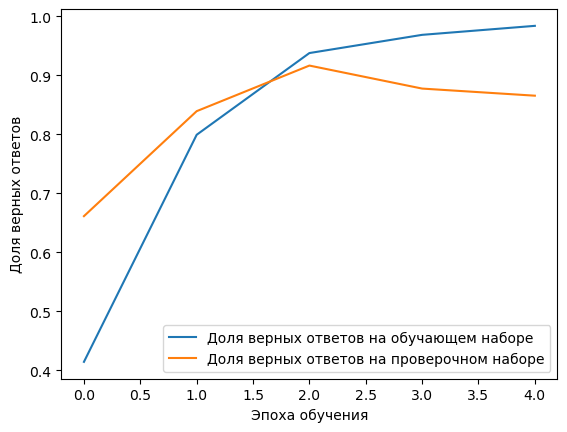

In [17]:
plt.plot(history_model.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_model.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [18]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 2s 39ms/step - loss: 0.5879 - accuracy: 0.8550
1400
1400
